## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?\
**They are both used to make predictions based on a dataset. However, classfication predicts grouping or a categorical. For example, KNN would lead to classification because the prediction is on clusters. Each cluster in this case would be a category. Regression would predict an actual numerical value based on the other numbers. For example, a linear regression would create a line of best fit and the predictions would be based on that.**
2. What is a confusion table/matrix? What does it help us understand about a model's performance? \
**A confusion matrix is a 2x2 table that shows the possibilities between actual and predicted outcomes. It helps us understand a model's performance by seeing whether the predictions are right or not. A model would be bad if it gave a lot of false positives and false negatives**
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?\
**Accuracy is the proportion of right over total. Therefore, a high accuracy would give the wrong impression that the model does not ever predict wrongly. Precision matters as well because we need to predict things that aren't true positives or true negatives. It needs to be able to detect real false negatives and false positives in order to fulfill it's purpose.**
4. What does the root mean squared error quantify about a particular model?\
**The RMSE is the average distance of actual points and the predicted point. In a linear regression model, it would be the average distance between the actual points from the dataset and the line of best fit.**
5. What are overfitting and underfitting? \
**Overfitting and underfitting concerns how well the model can predict the actual. An underfit model would be really simplistic and may not capture the main points at all. Therefore predictions using an underfit model might be too general and may not be too accurate. Overfitting an model, on the other hand, matches the original dataset too much, even capturing noise like outliers and like more outliers I guess. It would be fine but if another dataset were used to test the precision and accuracy of a overfit model, the prediction might be too much like the first and would not be general enough to be a good prediction.**
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?\
**Splitting the data into training and testing sets can help detect underfitting and overfitting. The training set uses the original dataset to create a fit, but the testing set compares it to a different set. Using these two, we can measure the RMSE and calculate a k to best fit a model, thereby improving the performance. In other words, by looking at the lowest RSME, we can choose a good k to use.**
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.\
**Reporting a class label simplifies things. Things are either classfied as one thing or another. Reporting a probability distribution gives more control and power to the data scientist because instead of the algorithm giving a definitive answer, it is the data scientist who looks at the numbers and give a conclusion. Therefore, class labels lack the nuance a probability distribution can give. However, probability distributions add complexity, whereas class labels are easier to identify.**

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).\
**The target label is "mine_type" and it consists of values 1-5. The values are roughly equally distributed with 338 values and a median of 3, which is the median of the value lables anyway. From a simple scatterplot of mine type, we can roughly see that mine type 1 has the lowest voltage. Mine type 2 has the highest and the rest decrease from mine type 2. Height has a wide range. Soil has a range of 0-1, incrementing by 2, so there is a set range of values. In terms of height, mine types 1-2 have the lowest while mine 5 has the highest. In terms of soil, mine type 1 is still the lowest while 5 remain the highest. The middle values differ.**
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)\
**Done**
3. Build a $k$-NN classifier. Explain how you select $k$.\
**Based on my KNN classifier, the best K is 3 because I perfromed a model fit for all the training and test sets between the target variable X and other others. I then made an accuracies table (which I think represents the RSME) and plotted that against a k grid of 160. I picked 160 because there were only like 168 samples and 80 was the trend of K was decreasing anyway so I figured 8 more ticks on the x-axis didn't matter that much. I then calculated the global max of the line plot and arrived at 3.**
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?\
**So the accuracy is higher for mine type 1 and 2. However, the rest aren't that accurate at all. For example, mine type 3 was misclassified 23 times out of 33, mine 4 was misclassified 31 out 35, and mine 5 was misclassified 25 times out of 28.**
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.\
**While a k of 3 was the highest on the classifier line plot, it gives very skewed precision, only being mostly correct for mine_type 1-2. The rest is very skewed. For someone else, maybe use a different K, like the second highest around k=18 and see how that goes. Given the errors that this model makes, they should not take any conclusions about mine type 3, 4, and 5 because it would be very accurate.**

In [213]:
# 4 Confusion table 
model = KNeighborsClassifier(n_neighbors = 3)
model = model.fit(u_train,y_train)
y_hat = model.predict(u_test)
pd.crosstab(y_test,y_hat)

col_0,1,2,3,4,5
mine_type,,,,,
1,28,0,5,3,2
2,0,24,5,2,4
3,8,0,10,3,12
4,17,2,11,4,1
5,12,0,11,2,3


Test accuracy for 3 neighbors is 0.40828402366863903; train accuracy for 3 neighbors is 0.6449704142011834
Test accuracy for 5 neighbors is 0.3905325443786982; train accuracy for 5 neighbors is 0.5798816568047337
Test accuracy for 7 neighbors is 0.3609467455621302; train accuracy for 7 neighbors is 0.5857988165680473
Test accuracy for 9 neighbors is 0.3727810650887574; train accuracy for 9 neighbors is 0.5384615384615384
Test accuracy for 11 neighbors is 0.40236686390532544; train accuracy for 11 neighbors is 0.5266272189349113
Test accuracy for 13 neighbors is 0.40236686390532544; train accuracy for 13 neighbors is 0.5325443786982249
Test accuracy for 15 neighbors is 0.378698224852071; train accuracy for 15 neighbors is 0.4970414201183432
Test accuracy for 17 neighbors is 0.38461538461538464; train accuracy for 17 neighbors is 0.4319526627218935
Test accuracy for 19 neighbors is 0.35502958579881655; train accuracy for 19 neighbors is 0.46153846153846156
Test accuracy for 21 neighbors 

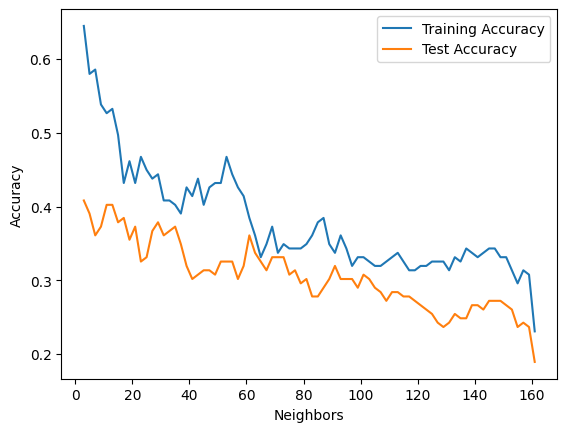

[3]


In [ ]:
# 3  knn Classifier

k_grid = np.array([ (2*k+3) for k in range(0,80)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results
    
sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where( is_optimal ) # Indices that maximize accuracy
k_optimal = k_grid[ optimal_indices ] # Values of k that maximize accuracy

print(k_optimal)

In [148]:
# 2 Train Tests
from sklearn.model_selection import train_test_split

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

y = df['mine_type']
X = df.loc[ : , ['voltage', 'height', 'soil'] ]
U = X.apply(minmax)

u_train, u_test, y_train, y_test = train_test_split(U, y, test_size=.5, random_state=100) 


In [149]:
print(df["mine_type"].value_counts())
print(df["voltage"].value_counts())

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
voltage
0.999999    18
0.335347     7
0.302114     7
0.314199     7
0.296072     6
            ..
0.561933     1
0.352960     1
0.352749     1
0.271994     1
0.519637     1
Name: count, Length: 196, dtype: int64


In [150]:
print(df["height"].value_counts())
print(df["soil"].value_counts())

height
0.181818    30
0.545455    30
0.636364    30
0.454545    29
0.727273    29
0.818182    29
0.363636    29
0.272727    28
0.909091    28
1.000000    27
0.090909    27
0.000000    22
Name: count, dtype: int64
soil
0.0    59
0.8    58
0.6    57
1.0    57
0.4    56
0.2    51
Name: count, dtype: int64


In [151]:
print(df["mine_type"].describe())
print(df["voltage"].describe())


count    338.000000
mean       2.952663
std        1.419703
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: mine_type, dtype: float64
count    338.000000
mean       0.430634
std        0.195819
min        0.197734
25%        0.309737
50%        0.359516
75%        0.482628
max        0.999999
Name: voltage, dtype: float64


In [152]:
print(df["height"].describe())
print(df["soil"].describe())

count    338.000000
mean       0.508876
std        0.306043
min        0.000000
25%        0.272727
50%        0.545455
75%        0.727273
max        1.000000
Name: height, dtype: float64
count    338.000000
mean       0.503550
std        0.344244
min        0.000000
25%        0.200000
50%        0.600000
75%        0.800000
max        1.000000
Name: soil, dtype: float64


In [202]:
df = pd.read_csv("data/land_mines.csv")
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


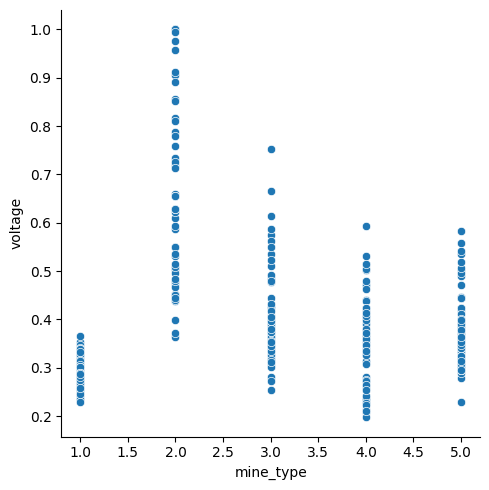

In [203]:
sns.relplot(df, x = "mine_type", y = "voltage", kind = "scatter")

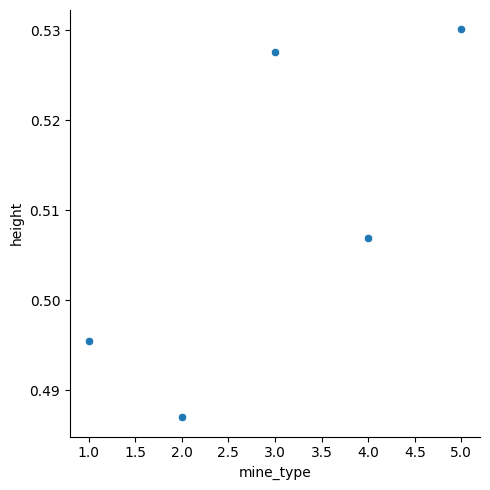

In [204]:
avg_height = df.groupby("mine_type", as_index = False)["height"].mean()
sns.relplot(avg_height, x = "mine_type", y = "height")

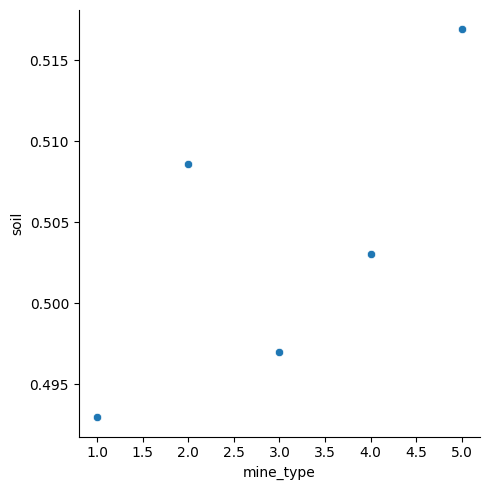

In [205]:
avg_soil = df.groupby("mine_type", as_index = False)["soil"].mean()
sns.relplot(avg_soil, x = "mine_type", y = "soil")

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.\
**There are no NA's to handle. There are 2499 rows and 3 total columns.**
2. Maxmin normalize `year` and `mileage`.\
**Done**
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.\
**Done**
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?\
**As the k increases, there seems to be more overlap between the points which may be indicative of the points coming closer together. At the same time, the MSE was steadily decreasing as k increased up until k = 300.**
5. Determine the optimal $k$ for these data.
**It is 77.**
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)\
**The MSE was really high when the k = 3, which may suggest overfitting since there are so little neighboring clusters to fit into. Thus, these clusters may include outliers and noise, causing the MSE to be higher. When k = 300, the MSE also became higher since the model underfit. It can no longer capture relationships since each cluster is it's own thing. At k = 77, think that is when over and under fitting is balanced.**


77


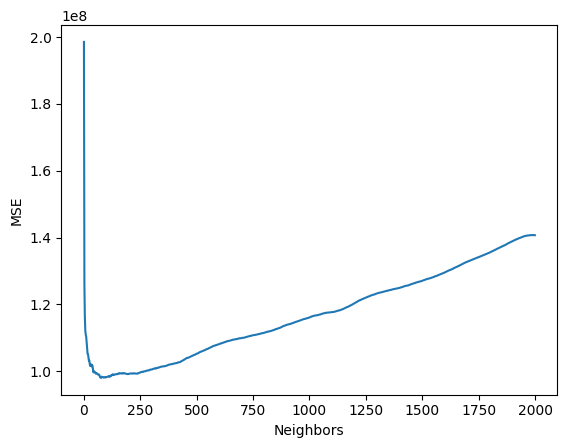

In [219]:
# 5

k_grid = [ (2*k+1) for k in range(1000) ] 
mses = [] 
for k in k_grid:
    model = KNeighborsRegressor(n_neighbors = k) 
    model = model.fit(u3_train,y3_train) 
    y3_hat = model.predict(u3_test)
    mses.append( mse(y3_test, y3_hat) )
sns.lineplot(x=k_grid, y=mses).set(ylabel='MSE', xlabel='Neighbors') 

index_star = np.argmin( mses ) 
k_star = k_grid[index_star]
print(k_star)

100477298.914212


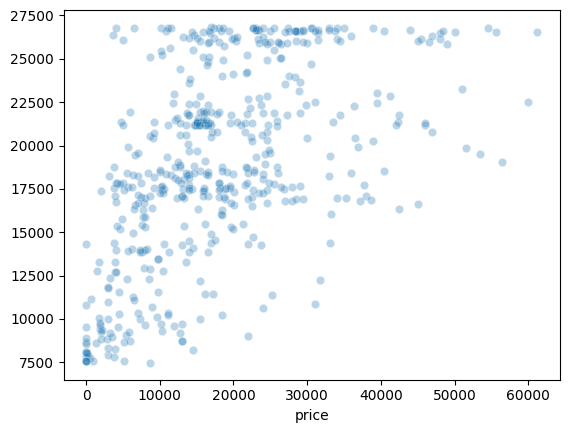

In [158]:
# 4 (k = 300)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 300) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

98276515.02300058


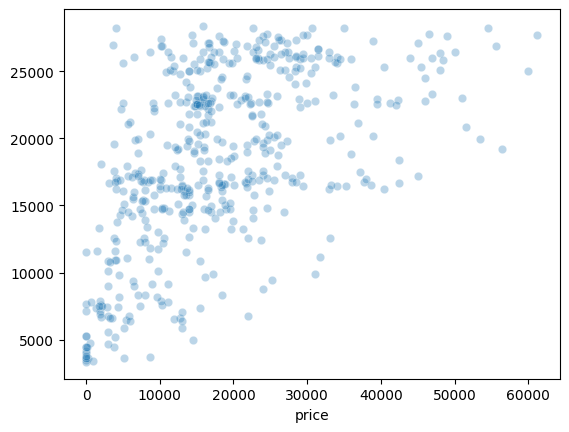

In [159]:
# 4 (k = 100)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 100) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

99685489.499396


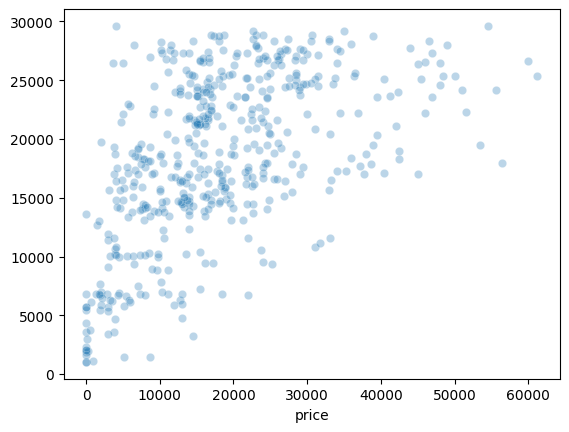

In [160]:
# 4 (k = 50)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 50) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

103174289.15223679


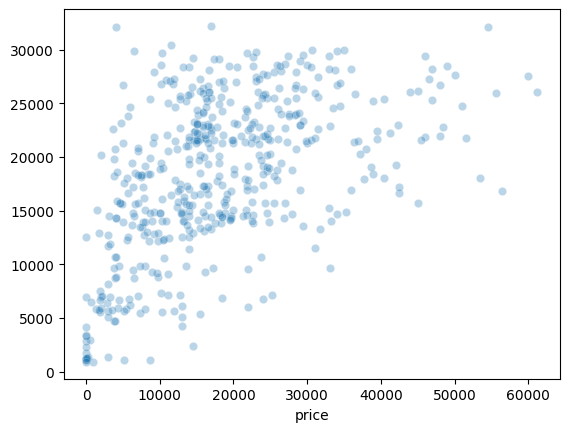

In [161]:
# 4 (k = 25)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 25) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

110653044.18681999


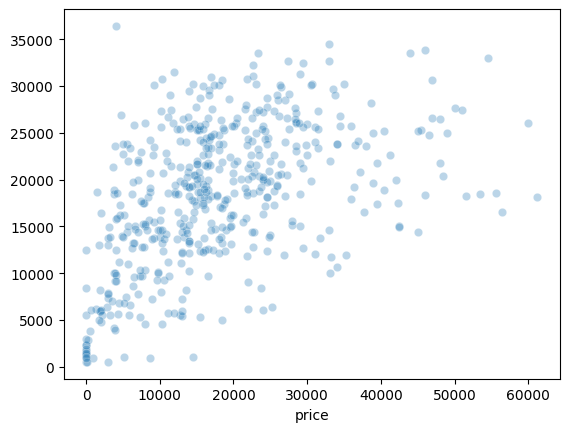

In [162]:
# 4 (k = 10)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 10) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

126118037.16488889


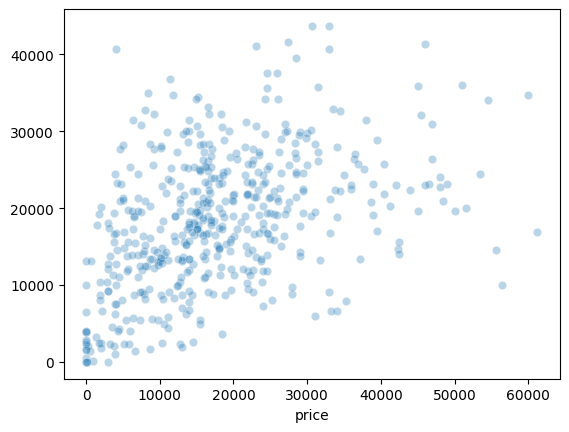

In [163]:
# 4 (k = 3)
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 3) 
model = model.fit(u3_train,y3_train)
y3_hat = model.predict(u3_test)

def mse(y_test, y_hat):
    mse = np.sum((y_test - y_hat)**2) / len(y_test)
    return mse

sns.scatterplot(x = y3_test, y = y3_hat, alpha = .3)
print(mse(y3_test, y3_hat))

In [164]:
# 2-3
def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

y_3 = cdf["price"]
X_3 = cdf.loc[:, ["year", "mileage"]]
U_3 = X_3.apply(minmax)


u3_train, u3_test, y3_train, y3_test = train_test_split(U_3, y_3, test_size = 0.2, random_state = 100)


In [214]:
# 1
old_cdf = pd.read_csv("data/USA_cars_datasets.csv")
cols = ['price','year', 'mileage']
cdf = old_cdf[cols]
print(cdf.head())
print(cdf.shape)
cdf.isna().sum()

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


price      0
year       0
mileage    0
dtype: int64

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `zoo.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?\
**The classes are all 101 rows with no NAs. In terms of variation in the features/covariates. From hair to airborn, there are only 2 possible values 0 and 1. For animals, there are many different values so this category has lots of variation. I think the animal column would be best to predict the class. In terms of the features like hair and feathers, I think feathers would identify with class 4. While hair and milk would identify with class 1.**
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)\
**Done.**
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.\
**The optimal k was 3. I selected three because I was using the optimal k generator from class notes and it give three. Originally, it was one, but that was when the range was from 0-10 instead of 0-24, which is the highest the range could go because of (2k+3). For some reason, the model breaks when I try to do 2k+1 and the k reverts back to being optimal at 1, which is not good because that is overfitting. By doing (2k+3), I think I removed the possibility of a 1 being k at all, so the algorithm picked the next lowest MSE.**
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?\
**From this confusion matrix, it is only accurate for class 1 and 2, being correct all the time. However, the model seems to confuse 3 and 4 and tends to classify 3 as 4. In addition, it 4 and 6 confused a couple of times. Lastly, 5 and 7 did not get classified correctly at all. 3 and 4 may have been confused because of their similar features. 3 seems to be some kind of snake/lizard class while 4 is fish. Both tend to lack hair and have eggs instead of milk. 7 may have been misclassified because there are not enough data. 5 also seems to be some kind of amphibian class so it would get classified as 4.**
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.\
**No, not  all of the results are represented. Classes 3, 5, 7 are still not represented. This could be because the three features milk, aquatic, and airborn are never mentioned in classes 3, 5, and 7. Or it could mean that the probability for a different class is higher, therefore the lesser probability class is never chosen as the nearest neighbor.**

In [266]:
model.predict_proba(u6_test.values)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.66666667, 0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.33333333, 0.        ,
        0.        , 0. 

In [262]:
# 5 
cols6 = ["class", "milk", "aquatic", "airborne"]
new_adf = adf[cols6]

y6 = new_adf['class']
X6 = new_adf.loc[ : , ['milk', 'aquatic', "airborne"] ]
U6 = X6.apply(minmax)

u6_train, u6_test, y6_train, y6_test = train_test_split(U6, y6, test_size = .5, random_state = 100) 
model = KNeighborsClassifier(n_neighbors = 3)
model = model.fit(u6_train,y6_train)
y6_hat = model.predict(u6_test)
pd.crosstab(y6_test,y6_hat)

col_0,1,2,4,6
class,,,,
1,23,0,0,0
2,0,4,0,8
3,0,2,1,0
4,0,0,3,0
5,0,0,3,0
6,0,1,0,4
7,0,0,2,0


In [258]:
# 4
model = KNeighborsClassifier(n_neighbors = 3)
model = model.fit(u5_train,y5_train)
y5_hat = model.predict(u5_test)
pd.crosstab(y5_test,y5_hat)

col_0,1,2,4,6
class,,,,
1,23,0,0,0
2,0,12,0,0
3,0,0,3,0
4,0,0,3,0
5,0,0,3,0
6,0,0,2,3
7,0,0,2,0


Test accuracy for 3 neighbors is 0.803921568627451; train accuracy for 3 neighbors is 0.74
Test accuracy for 5 neighbors is 0.7450980392156863; train accuracy for 5 neighbors is 0.74
Test accuracy for 7 neighbors is 0.7450980392156863; train accuracy for 7 neighbors is 0.72
Test accuracy for 9 neighbors is 0.7450980392156863; train accuracy for 9 neighbors is 0.72
Test accuracy for 11 neighbors is 0.7450980392156863; train accuracy for 11 neighbors is 0.72
Test accuracy for 13 neighbors is 0.7254901960784313; train accuracy for 13 neighbors is 0.66
Test accuracy for 15 neighbors is 0.7254901960784313; train accuracy for 15 neighbors is 0.66
Test accuracy for 17 neighbors is 0.7254901960784313; train accuracy for 17 neighbors is 0.66
Test accuracy for 19 neighbors is 0.7254901960784313; train accuracy for 19 neighbors is 0.66
Test accuracy for 21 neighbors is 0.7254901960784313; train accuracy for 21 neighbors is 0.66
Test accuracy for 23 neighbors is 0.7254901960784313; train accuracy 

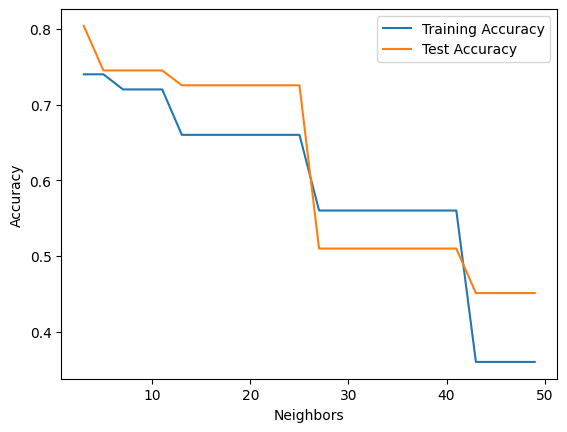

[3]


In [252]:
# 3 Classfication
# Select k
k_grid = np.array([ (2*k+3) for k in range(0,24)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: 
    model = KNeighborsClassifier(n_neighbors = k)
    model = model.fit(u5_train,y5_train) 
    y5_hat = model.predict(u5_test) # Predict values
    test_acc = model.score(u5_test,y5_test) # Compute test accuracy
    train_acc = model.score(u5_train,y5_train) # Compute trainin accuracy
    print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results
    
sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where( is_optimal ) # Indices that maximize accuracy
k_optimal = k_grid[ optimal_indices ] # Values of k that maximize accuracy

print(k_optimal)

In [225]:
# 2
def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

y5 = adf['class']
X5 = adf.loc[ : , ['hair', 'feathers', 'milk', 'eggs', "airborne"] ]
U5 = X5.apply(minmax)

u5_train, u5_test, y5_train, y5_test = train_test_split(U5, y5, test_size = .5, random_state = 100) 

In [259]:
# 1 
adf = pd.read_csv("data/zoo.csv")
print(adf.head())
print(adf.shape)
# print(adf.isna().sum())
print(adf["class"].unique())
print(adf["animal"].value_counts().sum())
print(adf["class"].value_counts())
adf.groupby("class")["animal"].value_counts().unstack()


     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
(101, 18)
[1 4 2 7 6 5 3]
101
class
1    41
2

animal,aardvark,antelope,bass,bear,boar,buffalo,calf,carp,catfish,cavy,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
class,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)